In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function definition
def f(t, y):
    return 3 + t - y

In [3]:
# Parameters
t0                = 0
t1                = 1
N                 = 30
y0                = 1
h                 = (t1 - t0) / N

In [4]:
# Initialization of arrays
t                 = np.zeros(N + 1)
t[0]              = t0
yEuler            = np.zeros(N + 1)
yEuler[0]         = y0
yModifiedEuler    = np.zeros(N + 1)
yModifiedEuler[0] = y0
yRK2              = np.zeros(N + 1)
yRK2[0]           = y0
yRK4              = np.zeros(N + 1)
yRK4[0]           = y0

In [5]:
# Numerical methods
for n in range(N):
    t[n + 1] = t[n] + h

    # Euler
    yEuler[n + 1] = yEuler[n] + h * f(t[n], yEuler[n])

    # Modified Euler
    wn = yModifiedEuler[n]
    tn = t[n]
    yModifiedEuler[n + 1] = wn + 0.5 * h * (f(tn, wn) + f(t[n + 1], wn + h * f(tn, wn)))

    # RK2
    wn = yRK2[n]
    yRK2[n + 1] = wn + h * f(tn + 0.5 * h, wn + 0.5 * h * f(tn, wn))

    # RK4
    wn = yRK4[n]
    k1 = h * f(tn, wn)
    k2 = h * f(tn + 0.5 * h, wn + 0.5 * k1)
    k3 = h * f(tn + 0.5 * h, wn + 0.5 * k2)
    k4 = h * f(t[n + 1], wn + k3)
    yRK4[n + 1] = wn + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

In [6]:
# Exact solution
yexact = 2 * np.ones_like(t) + t - np.exp(-t)

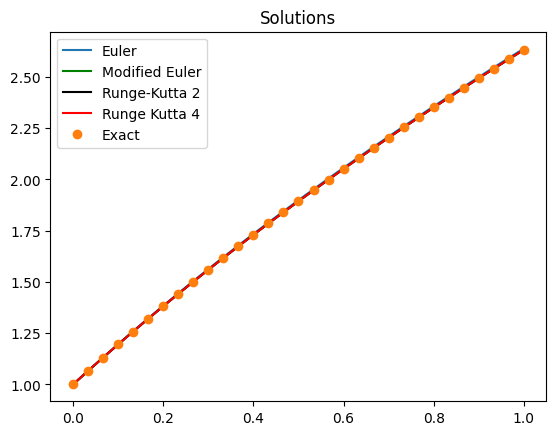

<ipython-input-7-6a43567ea2b0>:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, 20 * np.log10(np.abs(yEuler - yexact)), label='Euler')
<ipython-input-7-6a43567ea2b0>:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, 20 * np.log10(np.abs(yModifiedEuler - yexact)), 'g', label='Modified Euler')
<ipython-input-7-6a43567ea2b0>:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, 20 * np.log10(np.abs(yRK2 - yexact)), 'k', label='Runge-Kutta 2')
<ipython-input-7-6a43567ea2b0>:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, 20 * np.log10(np.abs(yRK4 - yexact)), 'r', label='Runge Kutta 4')


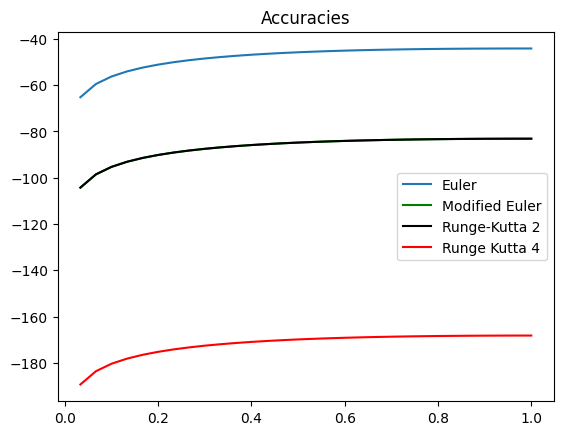

In [7]:
# Plot solutions
plt.figure(1)
plt.plot(t, yEuler, label='Euler')
plt.plot(t, yModifiedEuler, 'g', label='Modified Euler')
plt.plot(t, yRK2, 'k', label='Runge-Kutta 2')
plt.plot(t, yRK4, 'r', label='Runge Kutta 4')
plt.plot(t, yexact, 'o', label='Exact')
plt.title('Solutions')
plt.legend()
plt.show()

# Plot accuracies
plt.figure(2)
plt.plot(t, 20 * np.log10(np.abs(yEuler - yexact)), label='Euler')
plt.plot(t, 20 * np.log10(np.abs(yModifiedEuler - yexact)), 'g', label='Modified Euler')
plt.plot(t, 20 * np.log10(np.abs(yRK2 - yexact)), 'k', label='Runge-Kutta 2')
plt.plot(t, 20 * np.log10(np.abs(yRK4 - yexact)), 'r', label='Runge Kutta 4')
plt.title('Accuracies')
plt.legend()
plt.show()

In [8]:
print(yRK2)

[1.         1.06611111 1.13114784 1.1951454  1.25813786 1.32015815
 1.38123815 1.44140868 1.50069955 1.55913958 1.61675667 1.67357779
 1.72962904 1.78493564 1.83952201 1.89341175 1.9466277  1.99919194
 2.05112584 2.10245005 2.15318455 2.20334869 2.25296115 2.30204001
 2.35060278 2.39866635 2.4462471  2.49336086 2.54002292 2.58624809
 2.6320507 ]
